In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [5]:
data=pd.read_csv("Tele-communication Churn.csv")
data

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,16,no,43,no,19.3,14,2.70,67,19.47,331.1,161,6.60,14.7,68,9.36,6,no
1,2,AR,area_code_510,29,yes,21,no,1.0,15,4.21,88,29.09,109.7,92,29.85,122.8,114,10.49,2,yes
2,3,MO,area_code_415,236,yes,44,yes,10.1,4,2.23,105,31.79,204.8,13,7.34,7.7,165,11.85,4,no
3,4,OR,area_code_415,134,yes,25,yes,19.2,18,3.73,136,26.69,78.2,84,16.27,52.1,66,12.03,8,no
4,5,PA,area_code_408,102,yes,15,yes,4.7,18,0.69,12,28.45,31.0,63,8.57,286.4,129,17.71,5,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99997,99998,SD,area_code_510,61,no,28,no,6.4,12,1.48,79,16.03,234.4,145,30.62,234.8,19,12.80,3,no
99998,99999,WI,area_code_415,145,no,42,yes,17.8,18,2.56,13,8.58,191.4,99,18.29,86.5,83,4.32,1,yes
99999,100000,HI,area_code_415,167,yes,28,no,15.0,2,2.28,44,24.99,314.3,17,3.69,71.8,117,6.59,7,no
100000,100001,NC,area_code_408,194,no,2,yes,6.5,10,2.10,8,35.14,41.7,130,15.47,277.6,111,8.40,4,no


# 1. Basic Information & Summary

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100002 entries, 0 to 100001
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      100002 non-null  int64  
 1   state           100002 non-null  object 
 2   area.code       100002 non-null  object 
 3   account.length  100002 non-null  int64  
 4   voice.plan      100002 non-null  object 
 5   voice.messages  100002 non-null  int64  
 6   intl.plan       100002 non-null  object 
 7   intl.mins       100002 non-null  float64
 8   intl.calls      100002 non-null  int64  
 9   intl.charge     100002 non-null  float64
 10  day.calls       100002 non-null  int64  
 11  day.charge      100002 non-null  float64
 12  eve.mins        100002 non-null  float64
 13  eve.calls       100002 non-null  int64  
 14  eve.charge      100002 non-null  float64
 15  night.mins      100002 non-null  float64
 16  night.calls     100002 non-null  int64  
 17  night.char

In [8]:
#Data struture
print(type(data))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(100002, 20)


In [9]:
data.shape

(100002, 20)

In [10]:
#data types
data.dtypes

Unnamed: 0          int64
state              object
area.code          object
account.length      int64
voice.plan         object
voice.messages      int64
intl.plan          object
intl.mins         float64
intl.calls          int64
intl.charge       float64
day.calls           int64
day.charge        float64
eve.mins          float64
eve.calls           int64
eve.charge        float64
night.mins        float64
night.calls         int64
night.charge      float64
customer.calls      int64
churn              object
dtype: object

# 2.DataCleaning & Processing

In [12]:
#drop columns that are not needed
data1= data.drop(["Unnamed: 0","state","area.code"], axis =1)
data1


,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,16,no,43,no,19.3,14,2.70,67,19.47,331.1,161,6.60,14.7,68,9.36,6,no
1,29,yes,21,no,1.0,15,4.21,88,29.09,109.7,92,29.85,122.8,114,10.49,2,yes
2,236,yes,44,yes,10.1,4,2.23,105,31.79,204.8,13,7.34,7.7,165,11.85,4,no
3,134,yes,25,yes,19.2,18,3.73,136,26.69,78.2,84,16.27,52.1,66,12.03,8,no
4,102,yes,15,yes,4.7,18,0.69,12,28.45,31.0,63,8.57,286.4,129,17.71,5,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99997,61,no,28,no,6.4,12,1.48,79,16.03,234.4,145,30.62,234.8,19,12.80,3,no
99998,145,no,42,yes,17.8,18,2.56,13,8.58,191.4,99,18.29,86.5,83,4.32,1,yes
99999,167,yes,28,no,15.0,2,2.28,44,24.99,314.3,17,3.69,71.8,117,6.59,7,no
100000,194,no,2,yes,6.5,10,2.10,8,35.14,41.7,130,15.47,277.6,111,8.40,4,no


In [13]:
data.describe()

,Unnamed: 0,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
count,100002.000000,100002.000000,100002.000000,100002.000000,100002.000000,100002.000000,100002.000000,100002.000000,100002.000000,100002.000000,100002.000000,100002.000000,100002.000000,100002.000000,100002.000000
mean,50001.500000,121.187286,25.447351,10.008053,9.524220,2.702339,82.149067,29.883185,181.731640,84.389952,15.484086,197.664145,87.129647,8.904653,4.004560
std,28868.235147,69.856979,14.991819,5.773431,5.747165,1.561185,47.628825,17.242000,105.089867,49.180874,8.903875,113.910062,50.605987,5.128778,2.579549
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25001.250000,60.000000,12.000000,5.000000,5.000000,1.350000,41.000000,14.930000,90.500000,42.000000,7.780000,99.300000,43.000000,4.480000,2.000000
50%,50001.500000,121.000000,25.000000,10.000000,10.000000,2.700000,82.000000,29.880000,181.650000,84.000000,15.500000,197.600000,87.000000,8.930000,4.000000
75%,75001.750000,182.000000,38.000000,15.000000,14.000000,4.060000,123.000000,44.830000,273.200000,127.000000,23.160000,296.200000,131.000000,13.330000,6.000000
max,100002.000000,242.000000,51.000000,20.000000,19.000000,5.400000,164.000000,59.760000,363.700000,169.000000,30.910000,395.000000,174.000000,17.770000,8.000000


In [14]:
data1.info

<bound method DataFrame.info of         account.length voice.plan  voice.messages intl.plan  intl.mins  \
0                   16         no              43        no       19.3   
1                   29        yes              21        no        1.0   
2                  236        yes              44       yes       10.1   
3                  134        yes              25       yes       19.2   
4                  102        yes              15       yes        4.7   
...                ...        ...             ...       ...        ...   
99997               61         no              28        no        6.4   
99998              145         no              42       yes       17.8   
99999              167        yes              28        no       15.0   
100000             194         no               2       yes        6.5   
100001               3        yes              51       yes        2.3   

        intl.calls  intl.charge  day.calls  day.charge  eve.mins  eve.calls  \


<Axes: >

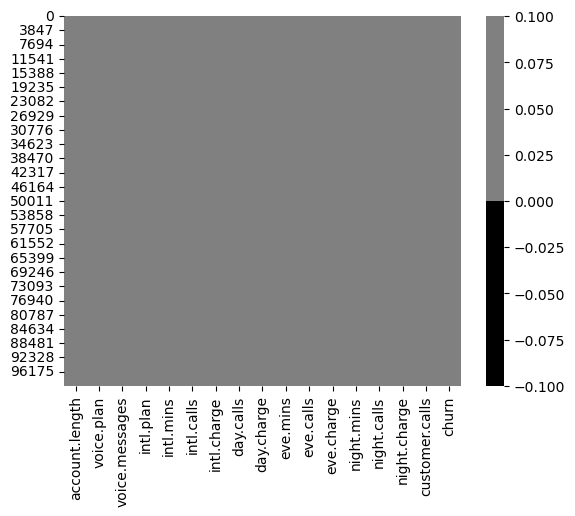

In [15]:
cols = data1.columns
colours = ['black', 'grey']
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colours),cbar = True)

In [16]:
median_customercalls = data1["customer.calls"].median()
mean_customercalls = data1["customer.calls"].mean()
print("Median of customer.calls: ", median_customercalls)
print("Mean of customer.calls: ",mean_customercalls)


Median of customer.calls:  4.0
Mean of customer.calls:  4.0045599088018236


In [17]:
median_daycharge= data1["day.charge"].median()
mean_daycharge = data1["day.charge"].mean()
print("Median of day.charge: ", median_daycharge)
print("Mean of day.charge: ",mean_daycharge)

Median of day.charge:  29.88
Mean of day.charge:  29.883184936301273


In [19]:
data1.head()

,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,16,no,43,no,19.3,14,2.70,67,19.47,331.1,161,6.60,14.7,68,9.36,6,no
1,29,yes,21,no,1.0,15,4.21,88,29.09,109.7,92,29.85,122.8,114,10.49,2,yes
2,236,yes,44,yes,10.1,4,2.23,105,31.79,204.8,13,7.34,7.7,165,11.85,4,no
3,134,yes,25,yes,19.2,18,3.73,136,26.69,78.2,84,16.27,52.1,66,12.03,8,no
4,102,yes,15,yes,4.7,18,0.69,12,28.45,31.0,63,8.57,286.4,129,17.71,5,no


In [20]:
data1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
99997     False
99998     False
99999     False
100000    False
100001    False
Length: 100002, dtype: bool

In [21]:
data1.rename({'day.calls': 'daycalls'}, axis=1, inplace = True)
data1

,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,daycalls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,16,no,43,no,19.3,14,2.70,67,19.47,331.1,161,6.60,14.7,68,9.36,6,no
1,29,yes,21,no,1.0,15,4.21,88,29.09,109.7,92,29.85,122.8,114,10.49,2,yes
2,236,yes,44,yes,10.1,4,2.23,105,31.79,204.8,13,7.34,7.7,165,11.85,4,no
3,134,yes,25,yes,19.2,18,3.73,136,26.69,78.2,84,16.27,52.1,66,12.03,8,no
4,102,yes,15,yes,4.7,18,0.69,12,28.45,31.0,63,8.57,286.4,129,17.71,5,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99997,61,no,28,no,6.4,12,1.48,79,16.03,234.4,145,30.62,234.8,19,12.80,3,no
99998,145,no,42,yes,17.8,18,2.56,13,8.58,191.4,99,18.29,86.5,83,4.32,1,yes
99999,167,yes,28,no,15.0,2,2.28,44,24.99,314.3,17,3.69,71.8,117,6.59,7,no
100000,194,no,2,yes,6.5,10,2.10,8,35.14,41.7,130,15.47,277.6,111,8.40,4,no


In [23]:
print(data1["daycalls"].value_counts())
mode_daycalls = data1["daycalls"].mode()[0]
print(mode_daycalls)

daycalls
98     673
150    671
163    668
135    661
6      660
      ... 
88     567
140    564
142    561
81     557
75     553
Name: count, Length: 165, dtype: int64
98


In [28]:
data1.rename({'eve.calls': 'evecalls'}, axis=1, inplace = True)
data1

,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,daycalls,day.charge,eve.mins,evecalls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,16,no,43,no,19.3,14,2.70,67,19.47,331.1,161,6.60,14.7,68,9.36,6,no
1,29,yes,21,no,1.0,15,4.21,88,29.09,109.7,92,29.85,122.8,114,10.49,2,yes
2,236,yes,44,yes,10.1,4,2.23,105,31.79,204.8,13,7.34,7.7,165,11.85,4,no
3,134,yes,25,yes,19.2,18,3.73,136,26.69,78.2,84,16.27,52.1,66,12.03,8,no
4,102,yes,15,yes,4.7,18,0.69,12,28.45,31.0,63,8.57,286.4,129,17.71,5,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99997,61,no,28,no,6.4,12,1.48,79,16.03,234.4,145,30.62,234.8,19,12.80,3,no
99998,145,no,42,yes,17.8,18,2.56,13,8.58,191.4,99,18.29,86.5,83,4.32,1,yes
99999,167,yes,28,no,15.0,2,2.28,44,24.99,314.3,17,3.69,71.8,117,6.59,7,no
100000,194,no,2,yes,6.5,10,2.10,8,35.14,41.7,130,15.47,277.6,111,8.40,4,no


In [32]:
print(data1["evecalls"].value_counts())
mode_evecalls = data1["evecalls"].mode()[0]
print(mode_evecalls)

evecalls
53     642
14     635
32     634
96     632
144    630
      ... 
105    546
156    544
123    533
106    524
124    520
Name: count, Length: 170, dtype: int64
53


In [33]:
data1.rename({'night.calls': 'nightcalls'}, axis=1, inplace = True)
data1.rename({'day.charge': 'daycharge'}, axis=1, inplace = True)
data1.rename({'account.length': 'accountlength'}, axis=1, inplace = True)
data1.rename({'voice.plan': 'voiceplan'}, axis=1, inplace = True)
data1.rename({'voice.messages': 'voicemessages'}, axis=1, inplace = True)
data1.rename({'intl.plan': 'intlplan'}, axis=1, inplace = True)
data1.rename({'intl.mins': 'intlmins'}, axis=1, inplace = True)
data1.rename({'intl.charge': 'intlcharge'}, axis=1, inplace = True)
data1.rename({'intl.calls': 'intlcalls'}, axis=1, inplace = True)
data1.rename({'daycharge': 'daycharge'}, axis=1, inplace = True)
data1.rename({'eve.mins': 'evemins'}, axis=1, inplace = True)
data1.rename({'eve.charge': 'evecharge'}, axis=1, inplace = True)
data1.rename({'night.mins':'nightmins'}, axis=1, inplace = True)
data1.rename({'night.charge':'nightcharge'}, axis=1, inplace = True)
data1.rename({'customer.calls': 'customercalls'}, axis=1, inplace = True)
data1

,accountlength,voiceplan,voicemessages,intlplan,intlmins,intlcalls,intlcharge,daycalls,daycharge,evemins,evecalls,evecharge,nightmins,nightcalls,nightcharge,customercalls,churn
0,16,no,43,no,19.3,14,2.70,67,19.47,331.1,161,6.60,14.7,68,9.36,6,no
1,29,yes,21,no,1.0,15,4.21,88,29.09,109.7,92,29.85,122.8,114,10.49,2,yes
2,236,yes,44,yes,10.1,4,2.23,105,31.79,204.8,13,7.34,7.7,165,11.85,4,no
3,134,yes,25,yes,19.2,18,3.73,136,26.69,78.2,84,16.27,52.1,66,12.03,8,no
4,102,yes,15,yes,4.7,18,0.69,12,28.45,31.0,63,8.57,286.4,129,17.71,5,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99997,61,no,28,no,6.4,12,1.48,79,16.03,234.4,145,30.62,234.8,19,12.80,3,no
99998,145,no,42,yes,17.8,18,2.56,13,8.58,191.4,99,18.29,86.5,83,4.32,1,yes
99999,167,yes,28,no,15.0,2,2.28,44,24.99,314.3,17,3.69,71.8,117,6.59,7,no
100000,194,no,2,yes,6.5,10,2.10,8,35.14,41.7,130,15.47,277.6,111,8.40,4,no


In [34]:
print(data1["nightcalls"].value_counts())
mode_nightcalls = data1["nightcalls"].mode()[0]
print(mode_nightcalls)

nightcalls
156    620
144    616
73     612
14     612
52     612
      ... 
28     529
75     528
104    527
120    524
76     515
Name: count, Length: 175, dtype: int64
156


In [35]:
mode_nightcharge	 = data1["nightcharge"].mode()[0]
data1["nightcharge	"] = data1["nightcharge"].fillna(mode_nightcharge	)
data1.isnull().sum()

accountlength    0
voiceplan        0
voicemessages    0
intlplan         0
intlmins         0
intlcalls        0
intlcharge       0
daycalls         0
daycharge        0
evemins          0
evecalls         0
evecharge        0
nightmins        0
nightcalls       0
nightcharge      0
customercalls    0
churn            0
nightcharge\t    0
dtype: int64

In [36]:
data1.tail()

,accountlength,voiceplan,voicemessages,intlplan,intlmins,intlcalls,intlcharge,daycalls,daycharge,evemins,evecalls,evecharge,nightmins,nightcalls,nightcharge,customercalls,churn,nightcharge\t
99997,61,no,28,no,6.4,12,1.48,79,16.03,234.4,145,30.62,234.8,19,12.80,3,no,12.80
99998,145,no,42,yes,17.8,18,2.56,13,8.58,191.4,99,18.29,86.5,83,4.32,1,yes,4.32
99999,167,yes,28,no,15.0,2,2.28,44,24.99,314.3,17,3.69,71.8,117,6.59,7,no,6.59
100000,194,no,2,yes,6.5,10,2.10,8,35.14,41.7,130,15.47,277.6,111,8.40,4,no,8.40
100001,3,yes,51,yes,2.3,12,3.84,76,24.58,338.2,5,2.24,126.0,5,5.28,8,yes,5.28


# 3. Churn Rate Analysis


Churn Distribution:
 churn
yes    50.133997
no     49.866003
Name: proportion, dtype: float64


C:\Users\saite\AppData\Local\Temp\ipykernel_23176\1571037156.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data1["churn"], palette='coolwarm')


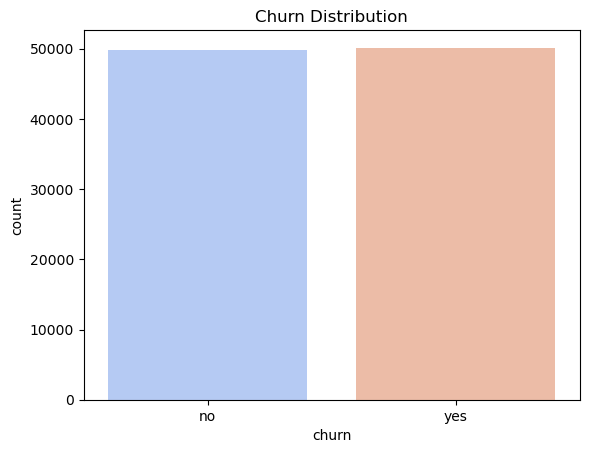

In [38]:
# 3. Churn Rate Analysis
print("\nChurn Distribution:\n", data1["churn"].value_counts(normalize=True) * 100)
sns.countplot(x=data1["churn"], palette='coolwarm')
plt.title("Churn Distribution")
plt.show()


# 4. Distribution of Numerical Features

C:\Users\saite\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


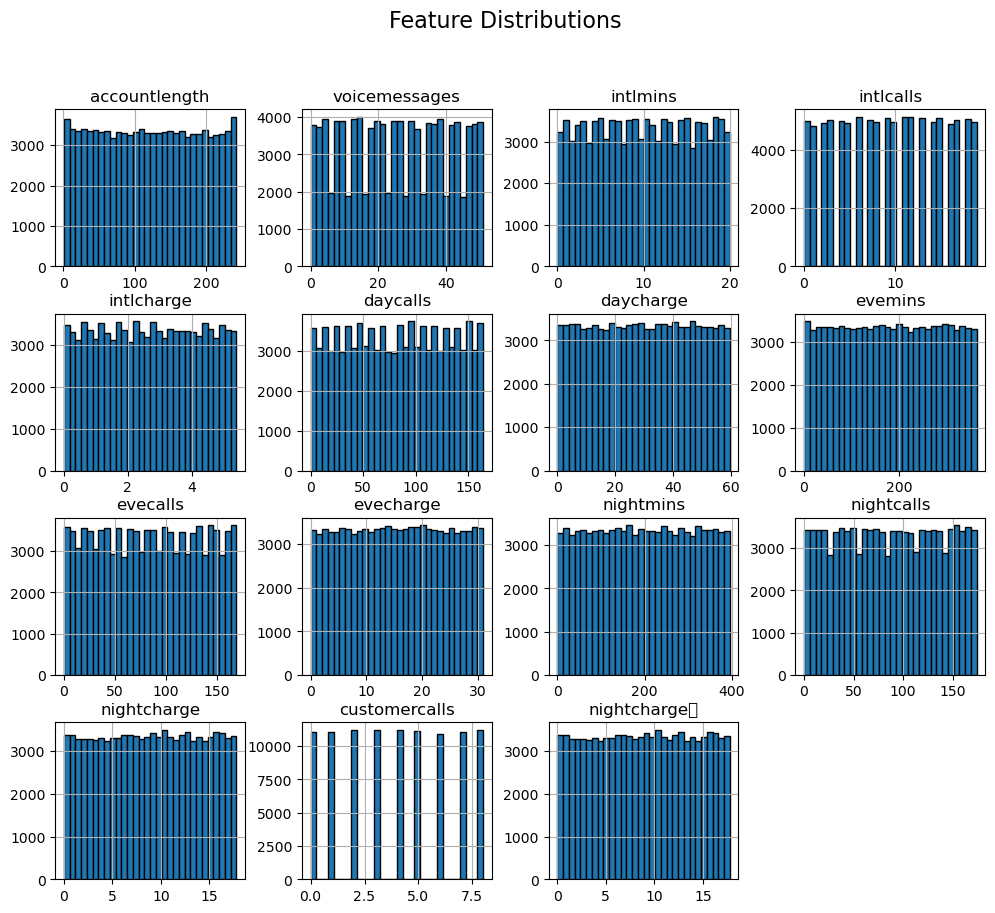

In [40]:
data1.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# 5. Correlation Heatmap

C:\Users\saite\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\saite\anaconda3\Lib\site-packages\seaborn\utils.py:648: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  bboxes = [l.get_window_extent() for l in labels]


<Figure size 1200x800 with 0 Axes>

C:\Users\saite\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


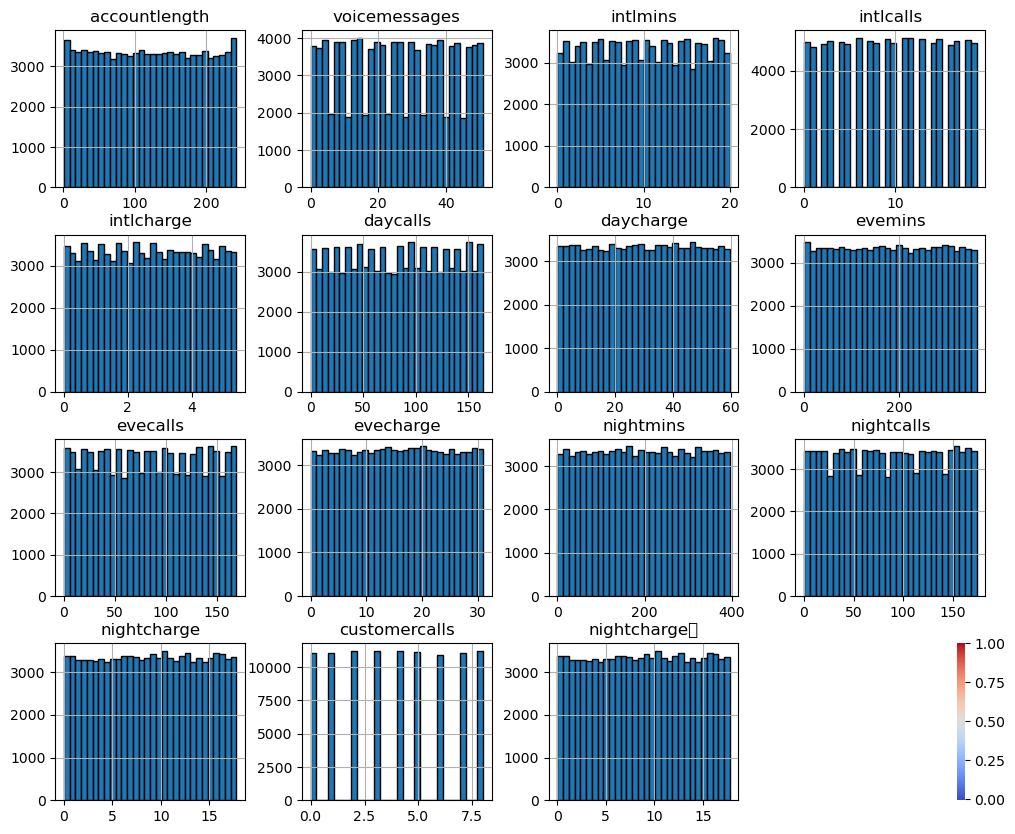

In [42]:
plt.figure(figsize=(12, 8))
data1.select_dtypes(include=['number']).hist(figsize=(12, 10), bins=30, edgecolor='black')
sns.heatmap(data1.select_dtypes(include=['number']).corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# 6. Churn Impact on Key Features

C:\Users\saite\AppData\Local\Temp\ipykernel_23176\3530498042.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='accountlength', data=data1, ax=axes[0, 0], palette='coolwarm')
C:\Users\saite\AppData\Local\Temp\ipykernel_23176\3530498042.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='nightcharge', data=data1, ax=axes[0, 1], palette='coolwarm')
C:\Users\saite\AppData\Local\Temp\ipykernel_23176\3530498042.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='customercalls', data=data1, ax=axes[1, 0],

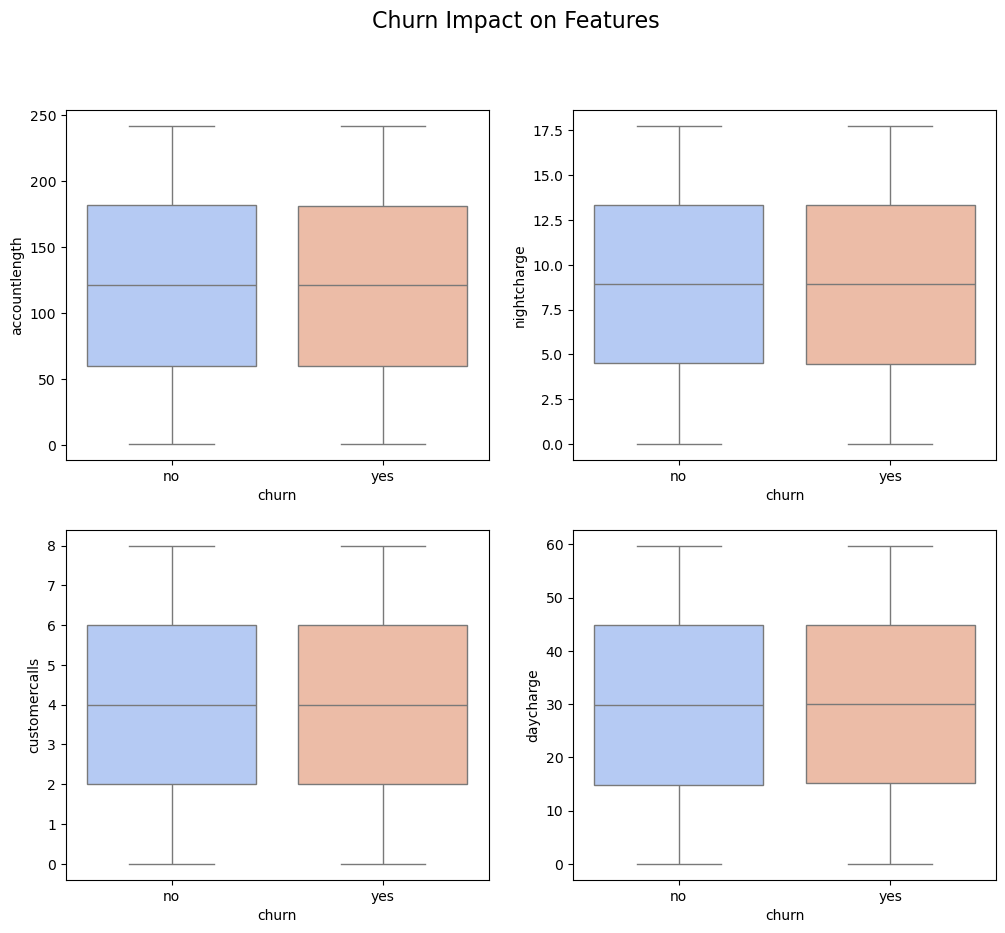

In [44]:
# 6. Churn Impact on Key Features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(x='churn', y='accountlength', data=data1, ax=axes[0, 0], palette='coolwarm')
sns.boxplot(x='churn', y='nightcharge', data=data1, ax=axes[0, 1], palette='coolwarm')
sns.boxplot(x='churn', y='customercalls', data=data1, ax=axes[1, 0], palette='coolwarm')
sns.boxplot(x='churn', y='daycharge', data=data1, ax=axes[1, 1], palette='coolwarm')
plt.suptitle("Churn Impact on Features", fontsize=16)
plt.show()


In [45]:
print(data1.columns)


Index(['accountlength', 'voiceplan', 'voicemessages', 'intlplan', 'intlmins',
       'intlcalls', 'intlcharge', 'daycalls', 'daycharge', 'evemins',
       'evecalls', 'evecharge', 'nightmins', 'nightcalls', 'nightcharge',
       'customercalls', 'churn', 'nightcharge\t'],
      dtype='object')


In [46]:
data1['churn'] = data1['churn'].map({'no': 0, 'yes': 1})
data1['voiceplan'] = data1['voiceplan'].map({'no': 0, 'yes': 1})
data1['intlplan'] = data1['intlplan'].map({'no': 0, 'yes': 1})
print(data1)

        accountlength  voiceplan  voicemessages  intlplan  intlmins  \
0                  16          0             43         0      19.3   
1                  29          1             21         0       1.0   
2                 236          1             44         1      10.1   
3                 134          1             25         1      19.2   
4                 102          1             15         1       4.7   
...               ...        ...            ...       ...       ...   
99997              61          0             28         0       6.4   
99998             145          0             42         1      17.8   
99999             167          1             28         0      15.0   
100000            194          0              2         1       6.5   
100001              3          1             51         1       2.3   

        intlcalls  intlcharge  daycalls  daycharge  evemins  evecalls  \
0              14        2.70        67      19.47    331.1       161   
1

# Feature Selection

# 1. Create New Features

In [49]:
#Estimate customer value based on account length and charges
data1['CLV'] = data1['accountlength'] * (data1['daycharge'] + data1['evecharge'] + data1['nightcharge'] + data1['intlcharge'])

In [50]:
print(data1[['accountlength', 'daycharge', 'evecharge', 'nightcharge', 'intlcharge', 'CLV']].head())
print(data1['CLV'].describe())



   accountlength  daycharge  evecharge  nightcharge  intlcharge       CLV
0             16      19.47       6.60         9.36        2.70    610.08
1             29      29.09      29.85        10.49        4.21   2135.56
2            236      31.79       7.34        11.85        2.23  12557.56
3            134      26.69      16.27        12.03        3.73   7868.48
4            102      28.45       8.57        17.71        0.69   5652.84
count    100002.000000
mean       6910.251559
std        4888.349804
min           9.850000
25%        2922.960000
50%        6047.430000
75%       10073.222500
max       25615.590000
Name: CLV, dtype: float64


   daycalls  evecalls  nightcalls  intlcalls  total.calls
0        67       161          68         14          310
1        88        92         114         15          309
2       105        13         165          4          287
3       136        84          66         18          304
4        12        63         129         18          222
count    100002.000000
mean        263.192886
std          85.403216
min          10.000000
25%         203.000000
50%         263.000000
75%         323.000000
max         517.000000
Name: total.calls, dtype: float64


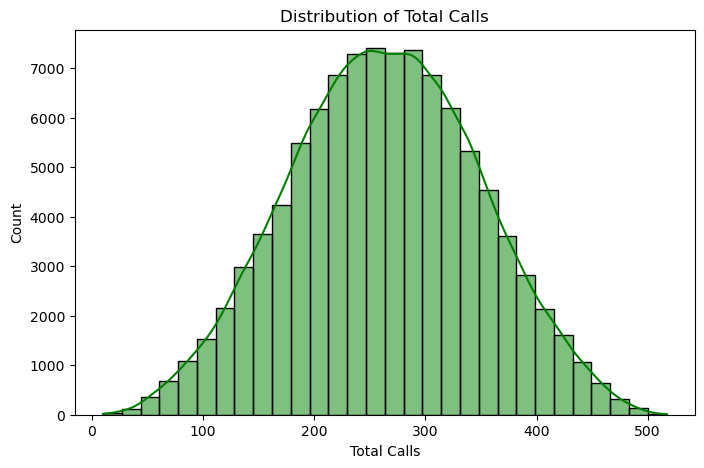

In [51]:
# Sum all calls to track engagement:
data1['total.calls'] = data1['daycalls'] + data1['evecalls'] + data1['nightcalls'] + data1['intlcalls']
print(data1[['daycalls', 'evecalls', 'nightcalls', 'intlcalls', 'total.calls']].head())
print(data1['total.calls'].describe())
plt.figure(figsize=(8, 5))
sns.histplot(data1['total.calls'], bins=30, kde=True, color='green')
plt.title("Distribution of Total Calls")
plt.xlabel("Total Calls")
plt.ylabel("Count")
plt.show()

   daycharge  evecharge  nightcharge  intlcharge  total.calls  charge_per_call
0      19.47       6.60         9.36        2.70          310         0.123000
1      29.09      29.85        10.49        4.21          309         0.238317
2      31.79       7.34        11.85        2.23          287         0.185401
3      26.69      16.27        12.03        3.73          304         0.193158
4      28.45       8.57        17.71        0.69          222         0.249640
count    100002.000000
mean          0.251182
std           0.171004
min           0.009609
25%           0.151709
50%           0.216730
75%           0.303260
max           8.796000
Name: charge_per_call, dtype: float64


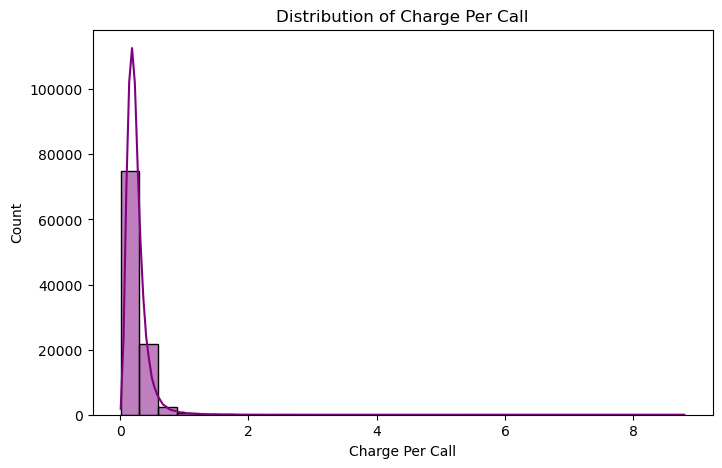

In [52]:
#Helps understand if the customer is paying more per call:
data1['charge_per_call'] = (data1['daycharge'] + data1['evecharge'] + data1['nightcharge'] + data1['intlcharge']) / data1['total.calls']
print(data1[['daycharge', 'evecharge', 'nightcharge', 'intlcharge', 'total.calls', 'charge_per_call']].head())
print(data1['charge_per_call'].describe())
data1['charge_per_call'] = data1['charge_per_call'].replace([np.inf, -np.inf], np.nan).fillna(0)
plt.figure(figsize=(8, 5))
sns.histplot(data1['charge_per_call'], bins=30, kde=True, color='purple')
plt.title("Distribution of Charge Per Call")
plt.xlabel("Charge Per Call")
plt.ylabel("Count")
plt.show()


   daycharge  high_day_usage  evecharge  high_eve_usage  nightcharge  \
0      19.47               0       6.60               0         9.36   
1      29.09               0      29.85               1        10.49   
2      31.79               1       7.34               0        11.85   
3      26.69               0      16.27               1        12.03   
4      28.45               0       8.57               0        17.71   

   high_night_usage  intlcharge  high_intl_usage  
0                 1        2.70                0  
1                 1        4.21                1  
2                 1        2.23                0  
3                 1        3.73                1  
4                 1        0.69                0  
high_day_usage      49992
high_eve_usage      49978
high_night_usage    49970
high_intl_usage     49939
dtype: int64


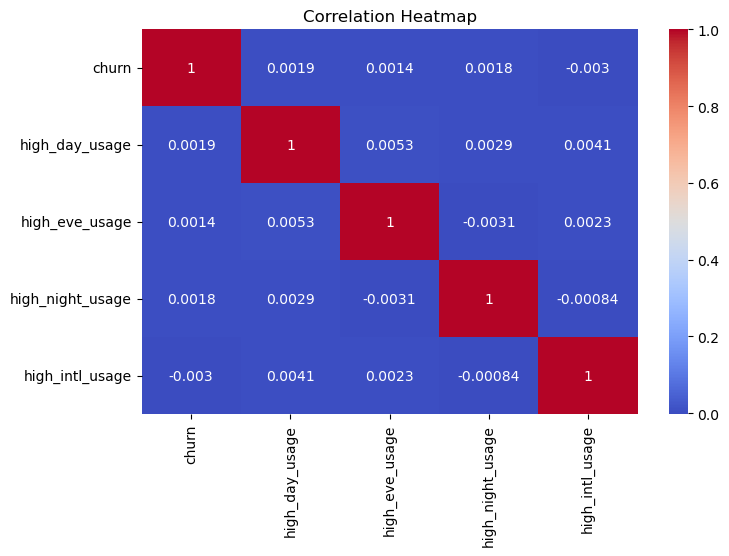

In [53]:
#Create binary indicators for high-usage customers:
data1['high_day_usage'] = (data1['daycharge'] > data1['daycharge'].median()).astype(int)
data1['high_eve_usage'] = (data1['evecharge'] > data1['evecharge'].median()).astype(int)
data1['high_night_usage'] = (data1['nightcharge'] > data1['nightcharge'].median()).astype(int)
data1['high_intl_usage'] = (data1['intlcharge'] > data1['intlcharge'].median()).astype(int)
print(data1[['daycharge', 'high_day_usage', 'evecharge', 'high_eve_usage', 
             'nightcharge', 'high_night_usage', 'intlcharge', 'high_intl_usage']].head())
print(data1[['high_day_usage', 'high_eve_usage', 'high_night_usage', 'high_intl_usage']].sum())
plt.figure(figsize=(8, 5))
sns.heatmap(data1[['churn', 'high_day_usage', 'high_eve_usage', 'high_night_usage', 'high_intl_usage']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

   customercalls  frequent_support_calls
0              6                       1
1              2                       0
2              4                       0
3              8                       1
4              5                       1
frequent_support_calls
0    55633
1    44369
Name: count, dtype: int64


C:\Users\saite\AppData\Local\Temp\ipykernel_23176\1179910969.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data1['frequent_support_calls'], y=data1['churn'], ci=None)


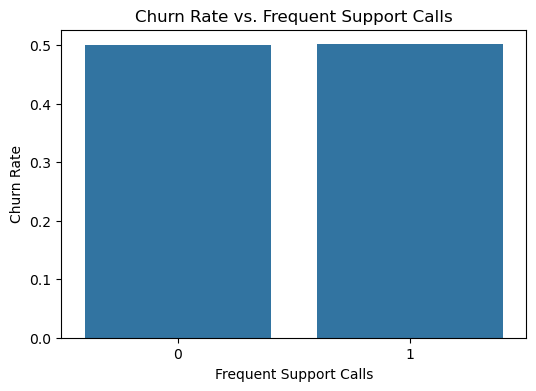

In [54]:
#Frequent support calls may indicate dissatisfaction:
data1['frequent_support_calls'] = (data1['customercalls'] > data1['customercalls'].median()).astype(int)
print(data1[['customercalls', 'frequent_support_calls']].head())
print(data1['frequent_support_calls'].value_counts())
plt.figure(figsize=(6, 4))
sns.barplot(x=data1['frequent_support_calls'], y=data1['churn'], ci=None)
plt.xlabel("Frequent Support Calls")
plt.ylabel("Churn Rate")
plt.title("Churn Rate vs. Frequent Support Calls")
plt.show()


In [55]:
#Scaling numerical features improves model efficiency:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_cols = ['accountlength', 'total.calls', 'charge_per_call', 'CLV', 'customercalls']
data1[num_cols] = scaler.fit_transform(data1[num_cols])
print(data1[num_cols].head())
print(data1[num_cols].describe())


   accountlength  total.calls  charge_per_call       CLV  customercalls
0       0.062241     0.591716         0.012905  0.023441          0.750
1       0.116183     0.589744         0.026030  0.083017          0.250
2       0.975104     0.546351         0.020007  0.490035          0.500
3       0.551867     0.579882         0.020890  0.306909          1.000
4       0.419087     0.418146         0.027318  0.220380          0.625
       accountlength    total.calls  charge_per_call            CLV  \
count  100002.000000  100002.000000    100002.000000  100002.000000   
mean        0.498702       0.499394         0.027494       0.269487   
std         0.289863       0.168448         0.019462       0.190908   
min         0.000000       0.000000         0.000000       0.000000   
25%         0.244813       0.380671         0.016173       0.113768   
50%         0.497925       0.499014         0.023573       0.235790   
75%         0.751037       0.617357         0.033421       0.393012   


C:\Users\saite\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\saite\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


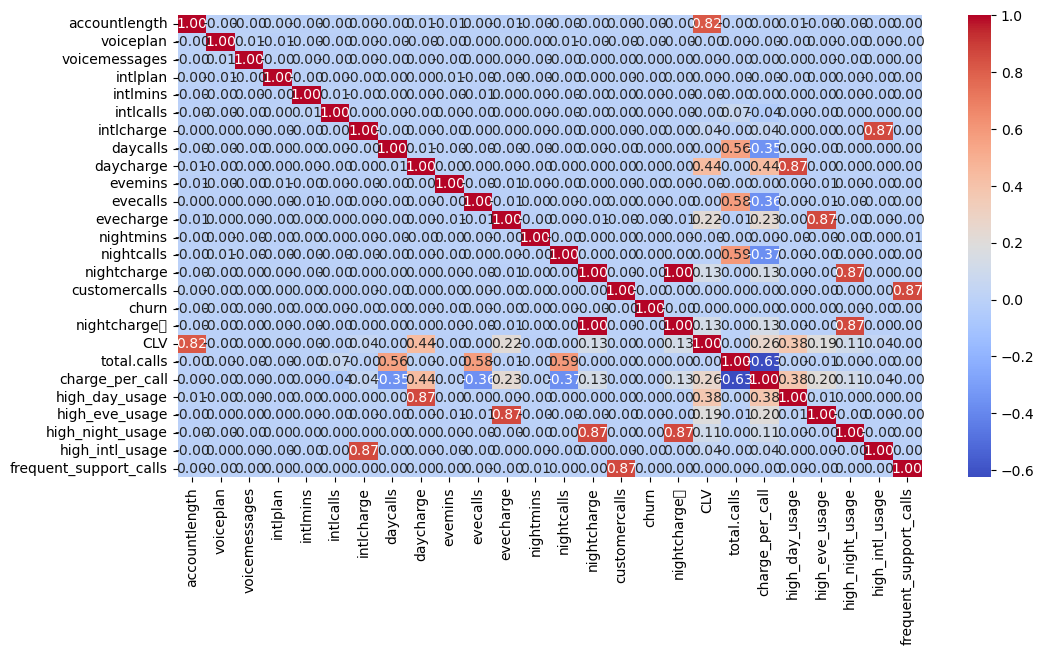

In [56]:
plt.figure(figsize=(12, 6))
sns.heatmap(data1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle
# ✅ Define features & target
X = data1.drop(columns=["churn"])  # Features (drop target variable)
y = data1["churn"]  # Target variable (1 = Churn, 0 = No Churn)

# ✅ Split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Train a simple model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ✅ Save the model to `churn_model.pkl`
with open("churn_model.pkl", "rb") as file:
    pickle.dump(model, file)

print("Model saved as churn_model.pkl")


 # Decision Tree for Feature Importance

In [ ]:
print(data1['churn'].isnull().sum())


In [ ]:
print("Dataset shape:", data1.shape)
print(data1.isnull().sum())  # Shows the number of missing values per column


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Define features & target
X = data1.drop(columns=['churn'])  # Features
y = data1['churn']  # Target variable

# Train Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# Plot feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh', figsize=(8,5), title="Top 10 Important Features")
plt.show()

In [ ]:
 # Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train XGBoost Model
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


# Improve Model Performance

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


# Interpret Model Predictions

In [ ]:
import shap

explainer = shap.Explainer(grid_search.best_estimator_)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


 # Deploy the Model

In [ ]:
df=data1

In [ ]:
import pickle
from flask import Flask, request, jsonify

app = Flask(__name__)
model = pickle.load(open('churn_model.pkl', 'rb'))

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    prediction = model.predict([data['features']])
    return jsonify({'churn_prediction': int(prediction[0])})

if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
df_model = df_clean.copy()
# Separate features and target
X = df_model.drop(columns='churn')
y = df_model['churn']

# Check final shape of features and a preview
X.shape, X.columns.tolist(), y.value_counts()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Standardize the entire feature set X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split on scaled data
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
ain Logistic Regression on scaled training data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test_scaled)
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)
roc_auc = roc_auc_score(y_test, y_proba)

conf_matrix, class_report, roc_auc

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

X = df_model.drop(columns='churn')
y = df_model['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
rf = RandomForestClassifier(n_estimators=100, max_depth = 10)
kfold = StratifiedKFold(n_splits=5)
scores = cross_val_score(rf, X_train, y_train, cv = kfold, scoring ='recall')
scores

In [ ]:
rf = RandomForestClassifier(n_estimators=200, max_depth = None)
rf.fit(X_train,y_train)
y_test_pred = rf.predict(X_test)
print(classification_report(y_test, y_test_pred))